In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
!pip install detecto

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [0]:
from detecto import core, utils, visualize

In [13]:

dataset = core.Dataset('/content/drive/My Drive/Projects/objects-detection/images/')
model = core.Model(['pear', 'strawberry'])
model.fit(dataset, verbose=1, epochs=100)

Epoch 1 of 100
Epoch 2 of 100
Epoch 3 of 100
Epoch 4 of 100
Epoch 5 of 100
Epoch 6 of 100
Epoch 7 of 100
Epoch 8 of 100
Epoch 9 of 100
Epoch 10 of 100
Epoch 11 of 100
Epoch 12 of 100
Epoch 13 of 100
Epoch 14 of 100
Epoch 15 of 100
Epoch 16 of 100
Epoch 17 of 100
Epoch 18 of 100
Epoch 19 of 100
Epoch 20 of 100
Epoch 21 of 100
Epoch 22 of 100
Epoch 23 of 100
Epoch 24 of 100
Epoch 25 of 100
Epoch 26 of 100
Epoch 27 of 100
Epoch 28 of 100
Epoch 29 of 100
Epoch 30 of 100
Epoch 31 of 100
Epoch 32 of 100
Epoch 33 of 100
Epoch 34 of 100
Epoch 35 of 100
Epoch 36 of 100
Epoch 37 of 100
Epoch 38 of 100
Epoch 39 of 100
Epoch 40 of 100
Epoch 41 of 100
Epoch 42 of 100
Epoch 43 of 100
Epoch 44 of 100
Epoch 45 of 100
Epoch 46 of 100
Epoch 47 of 100
Epoch 48 of 100
Epoch 49 of 100
Epoch 50 of 100
Epoch 51 of 100
Epoch 52 of 100
Epoch 53 of 100
Epoch 54 of 100
Epoch 55 of 100
Epoch 56 of 100
Epoch 57 of 100
Epoch 58 of 100
Epoch 59 of 100
Epoch 60 of 100
Epoch 61 of 100
Epoch 62 of 100
Epoch 63 of 100
E

In [8]:
# Specify the path to your image
image = utils.read_image('/content/drive/My Drive/Projects/objects-detection/validation/tiard-schulz-Zt3JBpD6afg-unsplash.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

['pear', 'pear', 'pear', 'pear', 'strawberry', 'strawberry', 'pear', 'strawberry', 'pear', 'strawberry', 'strawberry']
tensor([[2452.0452, 4442.3604, 3442.1204, 5482.8232],
        [2674.3801, 1145.6279, 3394.1516, 1775.2997],
        [1041.0961, 2159.0103, 1681.6707, 2878.9133],
        [1347.9764, 5104.0605, 2330.7642, 6038.6021],
        [2509.6628, 4483.7910, 3419.3689, 5410.0591],
        [1399.2557, 5132.0474, 2254.4934, 6039.6279],
        [3381.9875, 1852.3215, 4010.2595, 2570.3640],
        [ 468.3965, 2090.4727, 2573.8914, 3904.5376],
        [3676.3425,  610.6763, 4145.3604, 1329.3901],
        [3695.3311,  642.4642, 4156.2090, 1339.7739],
        [3406.6863, 1866.6628, 4016.7893, 2654.2969]])
tensor([0.5450, 0.4850, 0.4824, 0.3997, 0.1882, 0.1450, 0.1412, 0.1241, 0.1221,
        0.0999, 0.0965])


['strawberry', 'strawberry', 'strawberry', 'strawberry'] tensor([[2452.0452, 4442.3599, 3442.1204, 5482.8232],
        [2674.3801, 1145.6279, 3394.1516, 1775.2996],
        [1041.0961, 2159.0103, 1681.6707, 2878.9133],
        [1347.9767, 5104.0605, 2330.7642, 6038.6021]]) <class 'numpy.ndarray'>


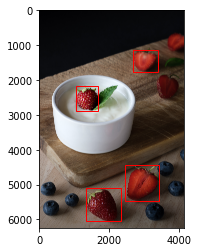

In [52]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
lab = []
box = []
for i in range(len(scores)):
  if scores[i] > 0.3:
    lab.append(labels[i])
    box.append(boxes[i])
box = torch.stack(box)
print(lab, box, type(image)) 
fig,ax = plt.subplots(1)
ax.imshow(image)
for i in range(len(box)):
  ax.add_patch(patches.Rectangle((box[i][0],box[i][1]),box[i][2] - box[i][0],box[i][3] - box[i][1],linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

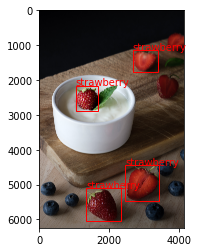

In [44]:
visualize.show_labeled_image(image, box, lab)

In [0]:
model.save('/content/drive/My Drive/Projects/objects-detection/model_weights.pth')

In [0]:
model = core.Model.load('/content/drive/My Drive/Projects/objects-detection/model_weights.pth', ['strawberry', 'pear'])


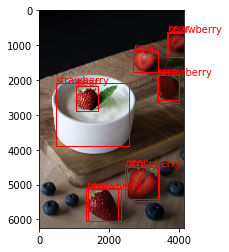

In [9]:
visualize.show_labeled_image(image, boxes, labels)
